In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from fractions import Fraction

In [2]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/JosueAfouda/Marketing-Pandas/master/marketing.csv')

In [3]:
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True


In [4]:
marketing_df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [5]:
marketing_df.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
10032,a100007290,1/17/18,Email,control,True,German,German,45-55 years,1/17/18,1/24/18,Email,False
10033,a100007291,1/17/18,Email,control,True,German,German,55+ years,1/17/18,NaN,Email,True
10034,a100007292,1/5/18,Instagram,control,False,German,German,55+ years,1/17/18,NaN,Email,True
10035,a100007293,1/17/18,Email,control,True,German,German,0-18 years,1/17/18,NaN,Email,True
10036,a100007294,1/6/18,Facebook,control,False,German,German,0-18 years,1/17/18,NaN,Email,True


In [6]:
# Voir la forme de données
marketing_df.shape

(10037, 12)

In [7]:
marketing_df.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')

In [8]:
marketing_df['is_retained'].unique()

array([True, False, nan], dtype=object)

In [9]:
# Voir les valeurs manquant

marketing_df.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [14]:
# Trans d'age.

marketing_df['age_group'].value_counts()

age_group
19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: count, dtype: int64

In [22]:
# les chaine de diffusion de pub.

marketing_df['marketing_channel'].value_counts()

marketing_channel
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: count, dtype: int64

In [23]:
# Pour avoir les proportions

In [24]:
# Avoir les proportion de réseaux en pourcentage 
marketing_df['marketing_channel'].value_counts(normalize = True)

marketing_channel
House Ads    0.472261
Instagram    0.186689
Facebook     0.185592
Push         0.099082
Email        0.056376
Name: proportion, dtype: float64

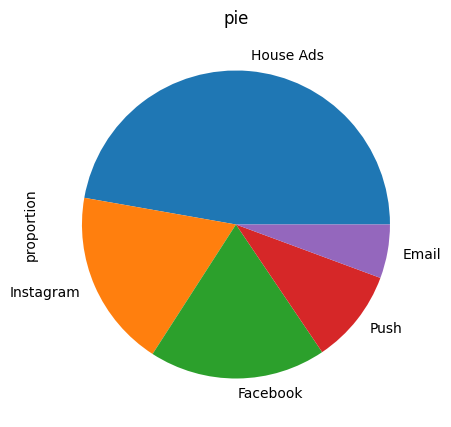

In [25]:
plt.figure(figsize = (5,5))
marketing_df['marketing_channel'].value_counts(normalize = True).plot(kind = 'pie')
plt.title('pie')
plt.show()

In [26]:
# Les variables date_served  date_subscribed date_canceled sont en format date.
# Nous essayons de convertir au format DATETIME

for i in ['date_served', 'date_subscribed', 'date_canceled']:
    marketing_df[i] = pd.to_datetime(marketing_df[i])

In [27]:
marketing_df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [28]:
# Les variables: date_served, date_subscribed et date_canceled sont en format DATATIME.

In [29]:
# Quel est le nombre d'utilisateurs retenus par la campagne marketing?

marketing_df['is_retained'].sum()

1279

In [30]:
marketing_df['is_retained'].value_counts(normalize = True )

is_retained
True     0.689116
False    0.310884
Name: proportion, dtype: float64

### Création des nouvelles colonnes

In [31]:
marketing_df['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

# __________________________________le 11/05/2024

In [32]:
# Dans l'analyses des données parfois nous sommes amenés à créer des nouvelles colonne à partir des colonnes existantes.
# Nous voulons créer une nouvellle variable par encodage des modalitées de la variables Subscribing_Channel.

# encodage à partir de la colonne subscribing_channel


In [33]:
# Dictionnaire de chaine distingues

dict_channel = {'House Ads' : 1, 
                'Instagram' : 2,  
                'Facebook' : 3,
                 'Push' : 4,
                 'Email': 5 }

In [34]:
# Création de la colonne channel code____mapping

marketing_df['channel_code'] = marketing_df['subscribing_channel'].map(dict_channel)

In [35]:
marketing_df['channel_code']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10032    5.0
10033    5.0
10034    5.0
10035    5.0
10036    5.0
Name: channel_code, Length: 10037, dtype: float64

In [36]:
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,5.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,5.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,5.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,5.0


In [40]:
# Ajoutons une nouvelle colonne aux langues pour savoir si le clients ont vu l'offre à leurs langue préférée ou pas
marketing_df['is_correct_lang'] = np.where(marketing_df['language_displayed'] == marketing_df['language_preferred'],
                                          'Yes', 'No')

In [41]:
marketing_df['is_correct_lang']

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
10032    Yes
10033    Yes
10034    Yes
10035    Yes
10036    Yes
Name: is_correct_lang, Length: 10037, dtype: object

In [42]:
marketing_df['is_correct_lang'].value_counts(normalize = True )

is_correct_lang
Yes    0.947992
No     0.052008
Name: proportion, dtype: float64

In [43]:
marketing_df

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,5.0,Yes
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,5.0,Yes
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,5.0,Yes
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,5.0,Yes


In [44]:
# Ajoutons une colonne "DOW" qui represente le jours de la semaine

marketing_df["DOW"] = marketing_df["date_subscribed"].dt.dayofweek
marketing_df["DOW"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    2.0
10035    2.0
10036    2.0
Name: DOW, Length: 10037, dtype: float64

In [45]:
# Les utilisateurs unique qui voient les annonces marketing chaque jour
# Pour avoir l'idée sur la performance du marketing
# Pour repondre à cette question il faut regrouper les observations (lignes de la dataFrame)
# Par Date_served et compter le nombre d'utilisateurs(Variables user_id)
# groupby = TCD sur Excel

daily_users = marketing_df.groupby('date_served')['user_id'].nunique()

In [46]:
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

Text(0.5, 1.0, "Le nombre d'utilisateur journalier regardant les annonces ")

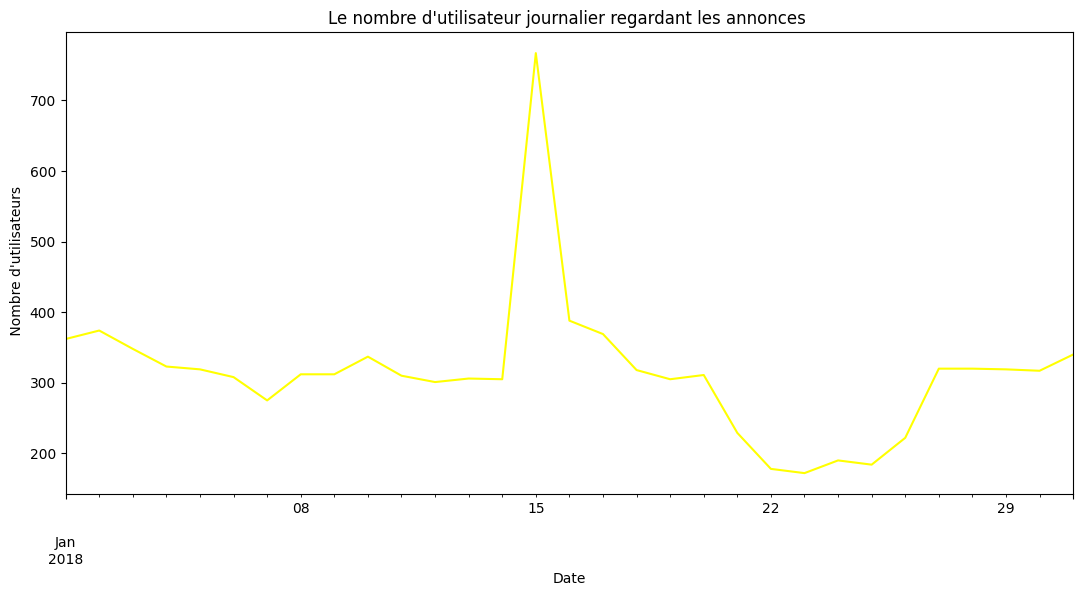

In [47]:
# Visualisation de résultats

plt.figure(figsize = (13,6))
daily_users.plot.line(color = "yellow")

plt.xlabel("Date")
plt.ylabel(" Nombre d'utilisateurs")
plt.title("Le nombre d'utilisateur journalier regardant les annonces ")

### Quelques indicateurs de performances 

In [48]:
# La campagne marketing a t-elle reussi? 
# Le succes se mesure par : 
#Taux de conversion 
#Taux de retention

#### Calcul du taux de conversion

In [49]:
# Calcul du taux de conversion global:
# Nombre d'utilisateurs uniques
n_unique_users = marketing_df['user_id'].nunique()
print("Le nombres d'utilisateurs uniques est:", n_unique_users)


# Nombre d'utilisateurs subscrit aux abonnements
n_subscripteurs = marketing_df[marketing_df['converted'] == True]['user_id'].nunique()
print('\n') # il permet d'espacer les textex dans les prints
print("Le nombres d'utilisateurs subscrit aux abonnements est:", n_subscripteurs)


# Calcul du taux de conversion
taux_conv_global = n_subscripteurs/n_unique_users
print('\n')
print("taux_conv_global est égal à : ", round(taux_conv_global*100, 2), "%")

Le nombres d'utilisateurs uniques est: 7309


Le nombres d'utilisateurs subscrit aux abonnements est: 1015


taux_conv_global est égal à :  13.89 %


#### Taux de retention

In [50]:
# Calcul du taux de retention global:
# Nombre d'utilisateurs uniques

retained = marketing_df[marketing_df["is_retained"] == True]["user_id"].nunique()
print("Le nombre d'utilisateurs retenu est : ", retained)
print("\n")


# Calcul du taux de retention global
Taux_retent_globale = retained/n_subscripteurs
print("Taux_retention_global:", round(Taux_retent_globale*100, 2),"%")

Le nombre d'utilisateurs retenu est :  678


Taux_retention_global: 66.8 %


#### Segmentation de clientele

#### Taux de retention apr canal de souscription

In [51]:
# Pour obtenir le taux de retention pour un canal de souscription, il faudra calculer les nombre total de retenus par ce canal
# Divisé par nombre total d'utilisateur ayant souscrit à un abonnement

In [52]:
# Nombre total d'utilisateur retenus par canal de marketing
n_retained_canal = marketing_df[marketing_df["is_retained"] == True].groupby("subscribing_channel")["user_id"].nunique()

In [53]:
n_retained_canal

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [54]:
# Pour chaque canal de souscription, calculons le nombre total d'utlisateurs du site web ayant souscrit à unn abonnement
n_subscribed = marketing_df[marketing_df["converted"] == True].groupby("subscribing_channel")["user_id"].nunique()

In [55]:
n_subscribed

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [56]:
# Calcul du taux de retention par canal

Taux_retention_par_canal = (n_retained_canal/n_subscribed)*100
Taux_retention_par_canal.sort_values(ascending = False)

#print(round(n_retained_canal/n_subscribed*100, 1), "%")

subscribing_channel
Email        87.577640
Push         70.129870
Facebook     68.778281
Instagram    68.103448
House Ads    58.053691
Name: user_id, dtype: float64

Text(0.5, 1.0, 'Le taux de retention par canal de souscription ')

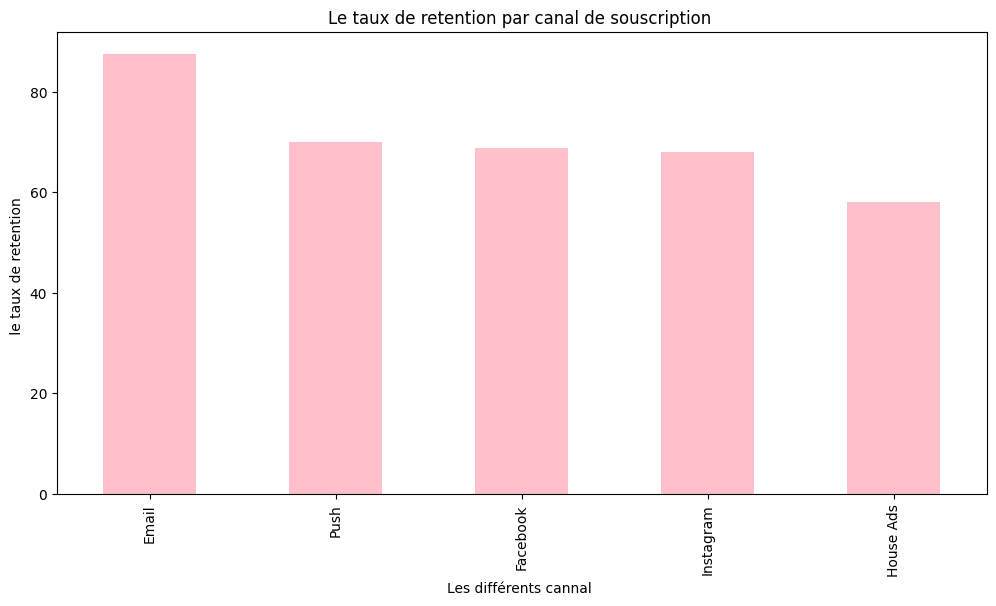

In [57]:
# Visualisation
plt.figure(figsize = (12,6))

Taux_retention_par_canal.sort_values(ascending = False).plot(kind = "bar", color = "Pink")

plt.xlabel("Les différents cannal ")
plt.ylabel(" le taux de retention  ")
plt.title("Le taux de retention par canal de souscription ")


In [58]:
# les couriers electroniques présentent le taux de retention le plus élévé parmi les canaux de souscription au service de cette entreprise

#### Automatisation du cacul de taux de retention

In [59]:
# Automatiser le TR afin d'eviter de recopier à plusieurs reprises
# Fonction du taux de RT
# On ne met pas des guillemet car nous n'avons pas utilisé directement le nom de la colonne

def retention_rate(dataFrame, column_names):
    retained = dataFrame[dataFrame["is_retained"] == True].groupby(column_names)["user_id"].nunique()
    converted = dataFrame[dataFrame["converted"] == True].groupby(column_names)["user_id"].nunique()
    retention_rate = retained/converted
    return retention_rate

In [60]:
# Appel de la fonction avec les arguments appropriés
retention_rate(marketing_df, ["subscribing_channel"])

subscribing_channel
Email        0.875776
Facebook     0.687783
House Ads    0.580537
Instagram    0.681034
Push         0.701299
Name: user_id, dtype: float64

In [61]:
# Calcul de taux de retention par groupe d'age de l'annonce
Taux_de_reten_group_dage = retention_rate(marketing_df, ["age_group"])*100
Taux_de_reten_group_dage 

age_group
0-18 years      87.500000
19-24 years     78.547855
24-30 years     87.719298
30-36 years    112.987013
36-45 years    113.513514
45-55 years    112.000000
55+ years       71.052632
Name: user_id, dtype: float64

In [62]:
# Calcul de taux de retention selon la langue de retention d'affichage de l'annonce________________________
Taux_de_reten_langue = retention_rate(marketing_df, ["language_displayed"])*100
Taux_de_reten_langue

language_displayed
Arabic      75.000000
English     66.846652
German      77.358491
Spanish    100.000000
Name: user_id, dtype: float64

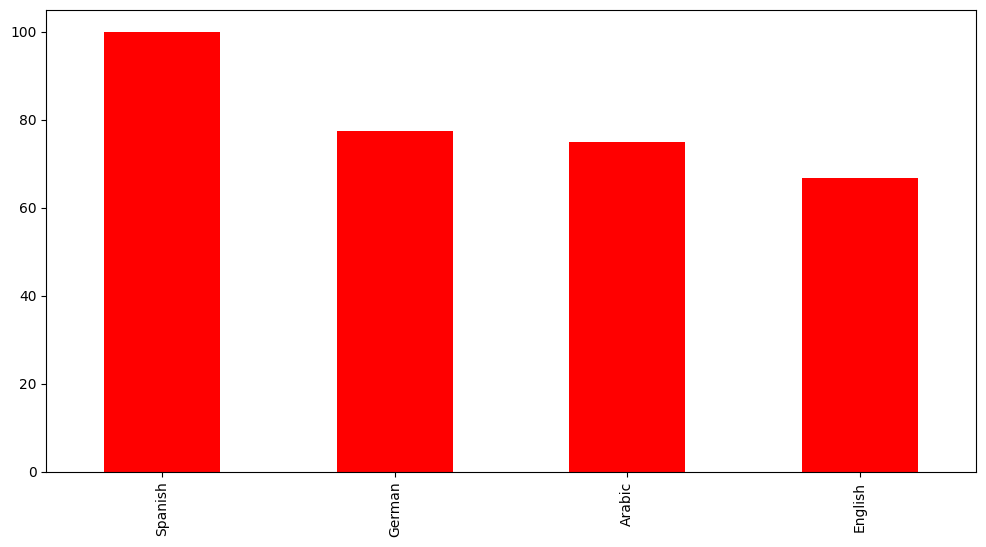

In [63]:
# Visualisation de resultat
plt.figure(figsize=(12, 6))


Taux_de_reten_langue.sort_values(ascending = False).plot(kind = "bar", color = "red")

plt.xlabel("")
plt.ylabel("")
plt.title("")

plt.show()

# ___________________________________le 12/05/2024

#### Taux de conversion par canal d'acquisition

In [64]:
# Nombre d'utilisateurs uniques ayant souscrit au service
# On met les guillemet car nous avons utilisé directement le nom de la colonne

n_subscripteurs_par_canal = marketing_df[marketing_df["converted"] == True].groupby("subscribing_channel")["user_id"].nunique()
#print("Nombre d'utilisateurs uniques ayant souscrit au service est: ", n_subscripteurs_par_canal)
#print("\n")

# Le nombre total de personnes atteintes par la campagne pour chaque canal
n_Total_par_canal = marketing_df.groupby("subscribing_channel")["user_id"].nunique()
#print("Le nombre total de personnes atteintes par la campagne pour chaque canal est :", n_Total_par_canal)
#print("\n")

Taux_convert_par_canal = n_subscripteurs_par_canal/n_Total_par_canal
print("Taux converti par canal est:", round(Taux_convert_par_canal*100, 1),"%" )

Taux converti par canal est: subscribing_channel
Email         83.9
Facebook     100.0
House Ads    100.0
Instagram    100.0
Push         100.0
Name: user_id, dtype: float64 %


#### Automatisation du cacul de taux de conversion

In [80]:
# Afin de ne pas recopier plusieurs fois le taux de conversion, nous definissions une fonction qui permettra d'automatiser
# ce calcul
def conversion_rate(dataFrame, column_names):
    
# Nonmbre total d'utilisateurs converties
    n_converted_by_canal = dataFrame[dataFrame["converted"] == True].groupby(column_names)["user_id"].nunique()
    

# Nonmbre total d'utilisateurs
    columns_total = dataFrame.groupby(column_names)["user_id"].nunique()
    
    
# Taux de conversion
    conversion_rate = (n_converted_by_canal/columns_total)*100
    

# Remplacement de valeurs manquantes par 0
    conversion_rate = conversion_rate.fillna(0)

    return conversion_rate

In [81]:
conversion_rate(marketing_df, ["subscribing_channel"])

subscribing_channel
Email         83.854167
Facebook     100.000000
House Ads    100.000000
Instagram    100.000000
Push         100.000000
Name: user_id, dtype: float64

In [82]:
# la fonction donne les mêmes valeurs

#### Taux de conversion par Langues de l'annonce 

In [83]:
# On veut calculer le taux de conversion pour chacune de langues d'annonces afin de savoir laquelles est la plus efficace 
# pour les campagnes
#Taux_conver_par_lang = marketing_df[marketing_df["language_displayed"] == True].groupby("subscribing_channel")["user_id"].nunique()

Taux_conver_by_lang = conversion_rate(marketing_df, ["language_displayed"])
print("Taux de conversion par Langue est :", Taux_conver_by_lang)

Taux de conversion par Langue est : language_displayed
Arabic     50.000000
English    12.916725
German     71.621622
Spanish    20.000000
Name: user_id, dtype: float64


#### Visualisation

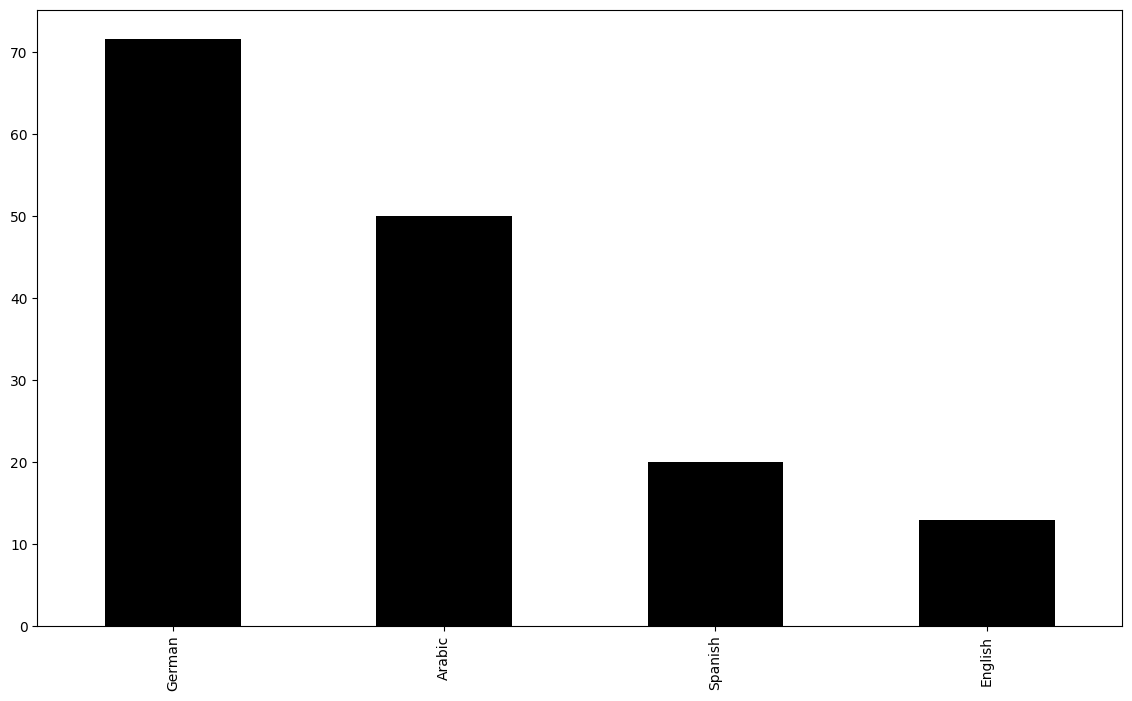

In [84]:
plt.figure(figsize= (14,8))

Taux_conver_by_lang.sort_values(ascending = False).plot(kind = 'bar', color = "black")


plt.xlabel("")
plt.ylabel("")
plt.title("")

plt.show()

#### Taux de conversion journalier

In [85]:
# Calcul de taux de conversion journalier

Taux_conver_journaliers = conversion_rate(marketing_df, ["date_served"])/100
Taux_conver_journaliers

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64

In [86]:
# Transformation du résultat en dataFrame
Taux_conver_journaliers= pd.DataFrame(Taux_conver_journaliers.reset_index())

In [87]:
Taux_conver_journaliers.columns = ["date_subscribed", "conversion_rate"]

In [88]:
Taux_conver_journaliers.head(10)

,date_subscribed,conversion_rate
0,2018-01-01,0.099448
1,2018-01-02,0.098930
2,2018-01-03,0.103448
3,2018-01-04,0.108359
4,2018-01-05,0.125392
5,2018-01-06,0.113636
6,2018-01-07,0.141818
7,2018-01-08,0.115385
8,2018-01-09,0.125000
9,2018-01-10,0.118694


In [89]:
# Jusqu'à présent, nous avons calculé des taux de retention et de reconversion en fonction d'une seule varialble.
# Sachez qu'il est possible de considerer plus d'une variable

#### Taux de conversion journalier par groupe d'ages 

In [90]:
Daily_Taux_conver_journ_par_group_age = conversion_rate(marketing_df, ["date_served","age_group"])
print("n/")
print("Taux de conversion journalier par groupe d'ages est :", Daily_Taux_conver_journ_par_group_age)

n/
Taux de conversion journalier par groupe d'ages est : date_served  age_group  
2018-01-01   0-18 years     15.517241
             19-24 years    19.672131
             24-30 years    10.526316
             30-36 years     4.081633
             36-45 years     4.255319
                              ...    
2018-01-31   24-30 years     5.769231
             30-36 years     0.000000
             36-45 years     3.508772
             45-55 years     2.325581
             55+ years       2.631579
Name: user_id, Length: 217, dtype: float64


#### Transformez ce données en uune DataFrame

In [91]:
Daily_Taux_conver_journ_par_group_age = pd.DataFrame(Daily_Taux_conver_journ_par_group_age.unstack(level=1))

In [92]:
Daily_Taux_conver_journ_par_group_age.head()

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
date_served,,,,,,,
2018-01-01,15.517241,19.672131,10.526316,4.081633,4.255319,2.222222,8.695652
2018-01-02,18.032787,16.438356,11.475410,4.000000,4.347826,4.347826,2.439024
2018-01-03,10.204082,20.895522,15.094340,4.255319,6.000000,4.761905,4.347826
2018-01-04,11.764706,20.000000,18.367347,4.545455,4.347826,6.122449,7.317073
2018-01-05,14.285714,25.000000,13.636364,9.090909,6.818182,4.651163,8.888889


#### Visualisation

<Figure size 1700x800 with 0 Axes>

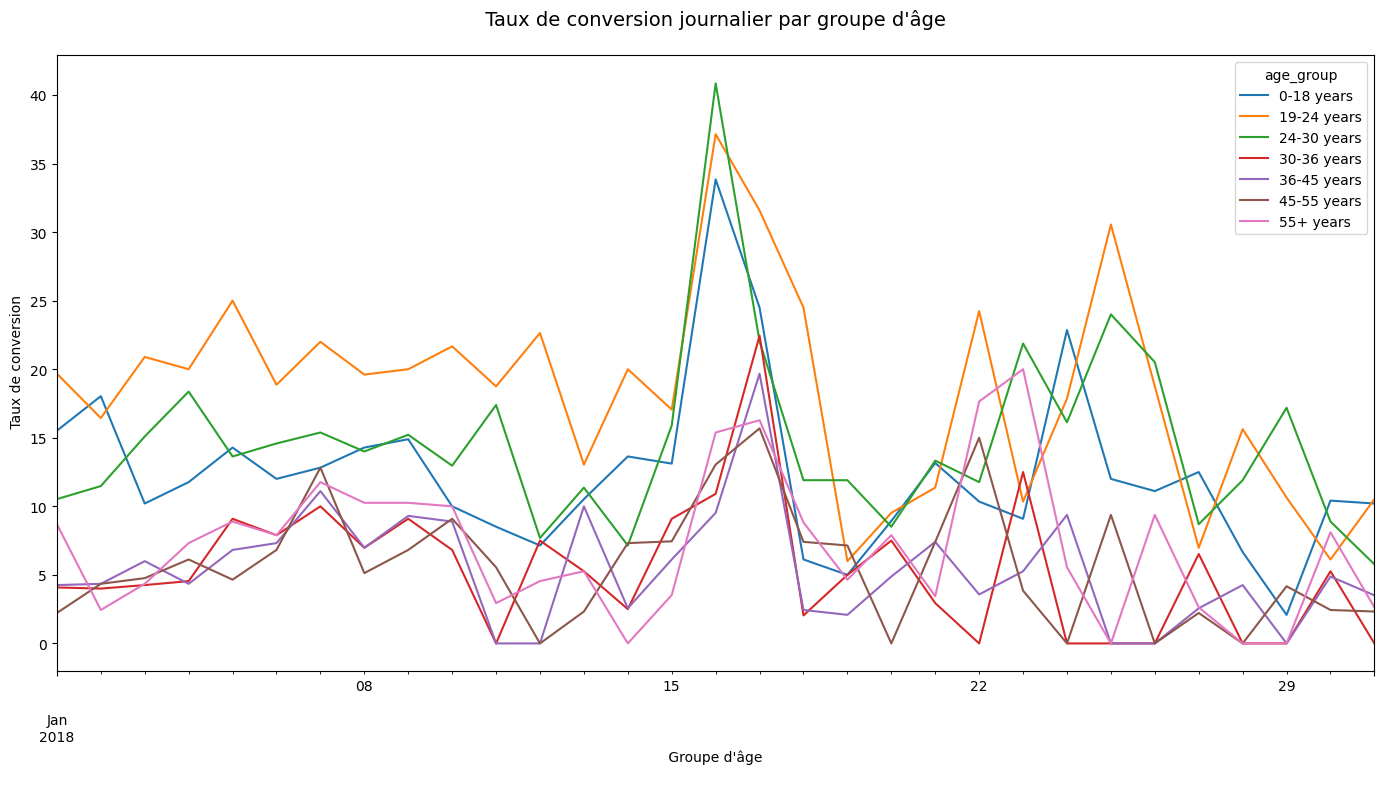

In [94]:
plt.figure(figsize= (17,8))

#Daily_Taux_conver_journ_par_group_age.sort_values(ascending = False).plot(kind = 'bar', color = "black")
Daily_Taux_conver_journ_par_group_age.plot(kind = "line", figsize= (17,8))

plt.xlabel(" Groupe d'âge \n")
plt.ylabel(" Taux de conversion")
plt.title(" Taux de conversion journalier par groupe d'âge \n", size = 10, fontsize = 14 )

plt.show()

#### TAUX DE CONVERSION JOURNALIER PAR CANAL MARKETING

In [95]:
daily_conv_rate_canal = conversion_rate(marketing_df, ['date_served', 'marketing_channel'])

In [96]:
daily_conv_rate_canal

date_served  marketing_channel
2018-01-01   Email                100.000000
             Facebook              11.764706
             House Ads              8.465608
             Instagram             10.666667
             Push                   8.333333
                                     ...    
2018-01-31   Email                100.000000
             Facebook               7.894737
             House Ads              3.821656
             Instagram              4.109589
             Push                   5.263158
Name: user_id, Length: 155, dtype: float64

In [97]:
daily_conv_rate_canal = pd.DataFrame(daily_conv_rate_canal.unstack (level=1) )

In [98]:
daily_conv_rate_canal.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
date_served,,,,,
2018-01-01,100.0,11.764706,8.465608,10.666667,8.333333
2018-01-02,100.0,9.836066,7.798165,12.903226,5.555556
2018-01-03,0.0,8.064516,8.854167,17.187500,8.333333
2018-01-04,50.0,13.846154,8.982036,12.698413,5.882353
2018-01-05,100.0,11.290323,12.658228,15.942029,2.777778


Text(0.5, 1.0, ' Taux de conversion journalier par Canal Marketing')

<Figure size 700x1400 with 0 Axes>

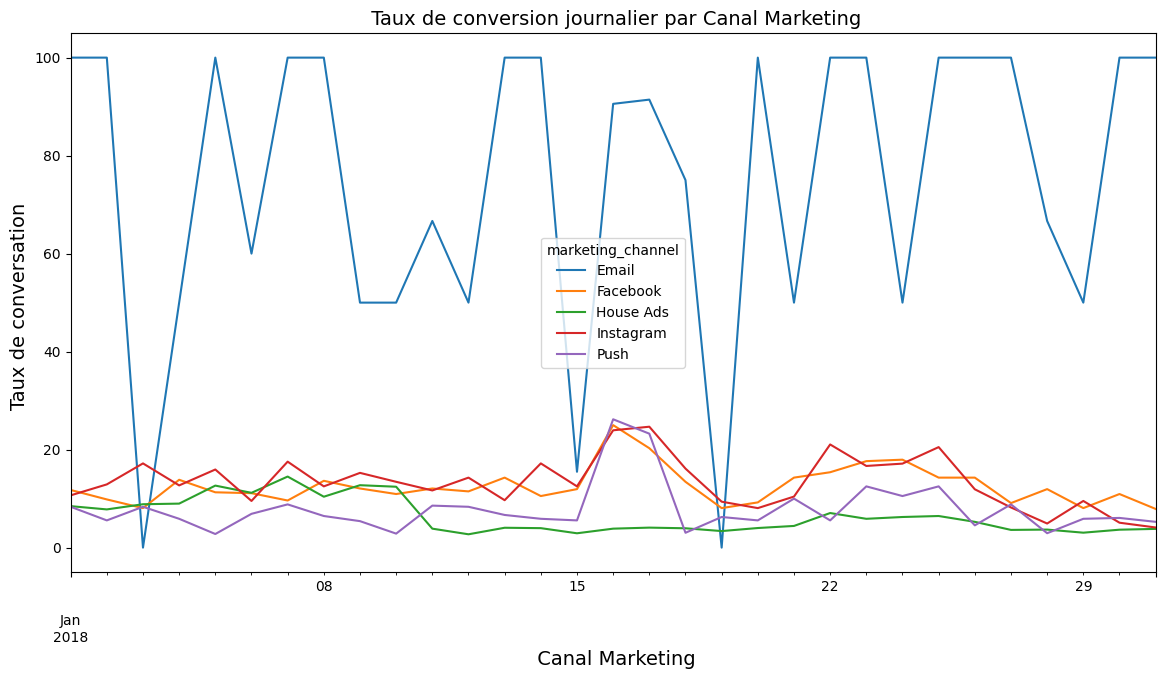

In [100]:
plt.figure(figsize=(7,14))

daily_conv_rate_canal.plot(kind = "line", figsize=(14, 7))
plt.xlabel(" Canal Marketing", fontsize =14 )
plt.ylabel("Taux de conversation ", fontsize =14 )


plt.title(" Taux de conversion journalier par Canal Marketing", size = 10, fontsize = 14)


#### TAUX DE CONVERSION PAR JOUR DE SEMAINE ET PAR CANAl MARKETING

In [101]:
# Colonne Jour de la semaine où l'annonce a été diffusée
marketing_df["DOW_served"] = marketing_df["date_served"].dt.dayofweek

In [102]:
marketing_df["DOW_served"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10032    2.0
10033    2.0
10034    4.0
10035    2.0
10036    5.0
Name: DOW_served, Length: 10037, dtype: float64

In [103]:
# Taux de conversion par jour de la semaine et par canal marketig

DOW_conversion = conversion_rate(marketing_df, ['DOW_served', 'marketing_channel'])

In [104]:
#DOW_conversion

In [105]:
Taux_conversion = pd.DataFrame(DOW_conversion.unstack(level = 1))

In [106]:
Taux_conversion

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DOW_served,,,,,
0.0,16.262136,11.960133,6.265985,12.251656,6.451613
1.0,90.625000,14.788732,7.031250,15.194346,11.585366
2.0,83.720930,12.703583,7.526882,15.015974,10.588235
3.0,72.727273,13.333333,5.903399,14.349776,6.779661
4.0,66.666667,11.013216,6.227758,12.987013,5.555556
5.0,81.818182,10.937500,5.756579,8.870968,6.976744
6.0,75.000000,11.607143,6.521739,12.719298,6.557377


(0.0, 94.87847222222223)

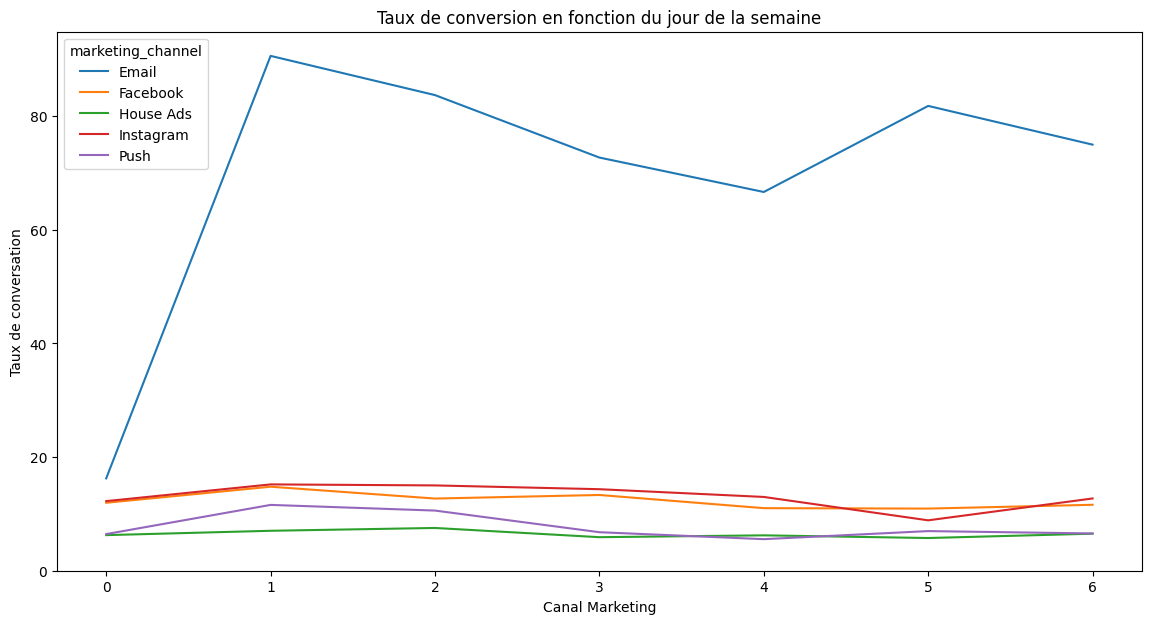

In [107]:
# Taux de conersion en fonction du jour de la semaine 

Taux_conversion.plot( figsize =(14,7))
plt.title("Taux de conversion en fonction du jour de la semaine")
plt.xlabel("Canal Marketing")
plt.ylabel("Taux de conversation")

plt.ylim(0)

#### Nous avons calculé les taux de conversion et de rétention pour divers segments ou combinaison de segments. Il y a d'autres types d'analyses que vous pouvez effectuer.


* PREFERENCES JOURNALIERES LINGUISTIQUES DES UTILISATEURS

In [108]:
# Nombres d'utilisateurs pour chaque langue préférée à chaque date

n_user_lang = marketing_df.groupby(["date_served", "language_preferred"])["user_id"].nunique()

In [109]:
n_user_lang

date_served  language_preferred
2018-01-01   Arabic                  4
             English               342
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
                                  ... 
2018-01-30   Spanish                19
2018-01-31   Arabic                  8
             English               310
             German                  5
             Spanish                17
Name: user_id, Length: 121, dtype: int64

In [110]:
n_user_prefere_lang_date = pd.DataFrame(n_user_lang.unstack(level = 1))

In [111]:
n_user_prefere_lang_date.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


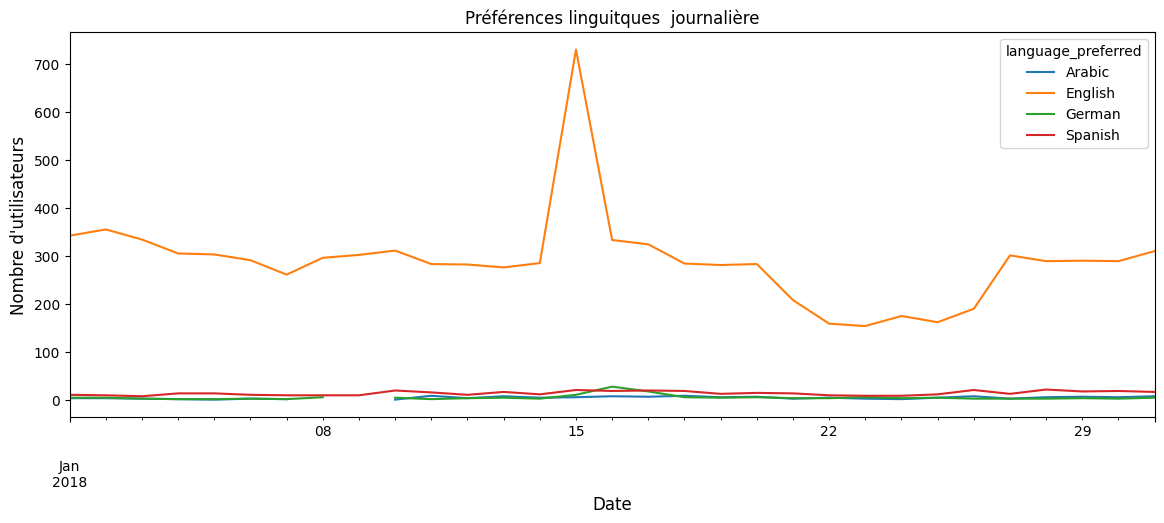

In [112]:
n_user_prefere_lang_date.plot(figsize = (14, 5))

plt.xlabel("Date", fontsize =12)
plt.ylabel("Nombre d'utilisateurs", fontsize =12)

plt.title("Préférences linguitques  journalière", fontsize =12)
plt.show()


#### PREFERENCES LINGUISTIQUES PAR GROUPE D'AGE

In [113]:
# Nombre d'utilisateurs par groupe d'âges et langues préférées n_ lang per

n_user_by_age_group = marketing_df.groupby(["age_group", "language_preferred"])["user_id"].nunique()

In [114]:
n_user_by_age_group = pd.DataFrame(n_user_by_age_group.unstack(level =1))

In [115]:
n_user_by_age_group.head()

language_preferred,Arabic,English,German,Spanish
age_group,,,,
0-18 years,16,1126,24,43
19-24 years,18,1218,23,51
24-30 years,16,1121,29,54
30-36 years,12,978,12,57
36-45 years,13,993,14,39


<Axes: xlabel='age_group'>

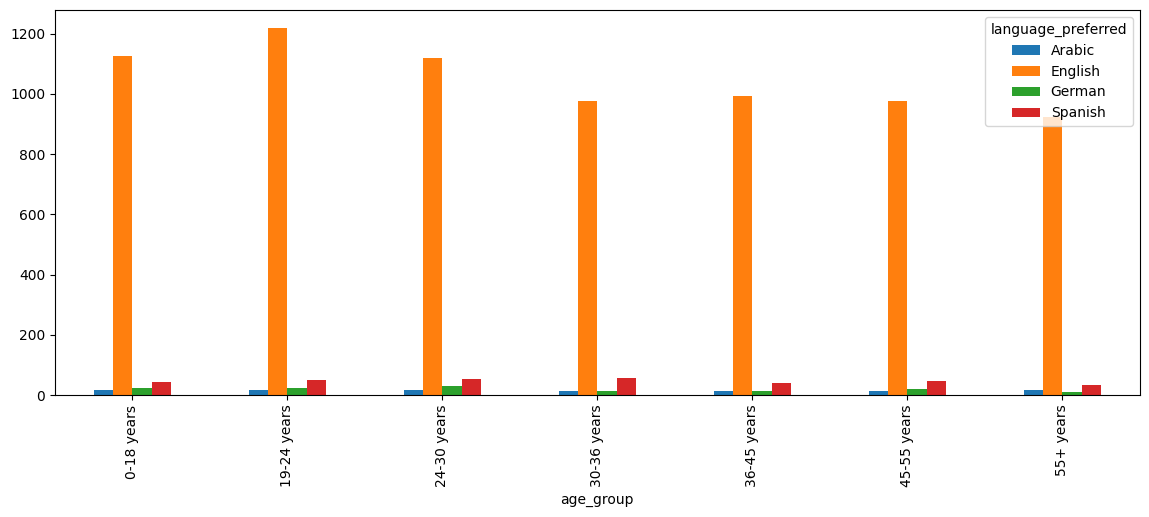

In [116]:
n_user_by_age_group.plot(kind = "bar", figsize = (14, 5) )

#### CANAUX MARKETING SELON LES GROUPES D'AGES

In [117]:
# Nombre d'utilisateurs par groupe d'âges et canal d'acquisition
# le colonnes desirées : User_id, marketing_channel et age_group

canal_age = marketing_df.groupby(['age_group', 'marketing_channel'])['user_id'].nunique()

In [118]:
canal_age = pd.DataFrame(canal_age.unstack(level = 1))

In [119]:
canal_age.head()

marketing_channel,Email,Facebook,House Ads,Instagram,Push
age_group,,,,,
0-18 years,91,256,585,292,184
19-24 years,107,331,643,301,144
24-30 years,116,289,587,268,180
30-36 years,60,238,600,252,83
36-45 years,63,217,505,268,192


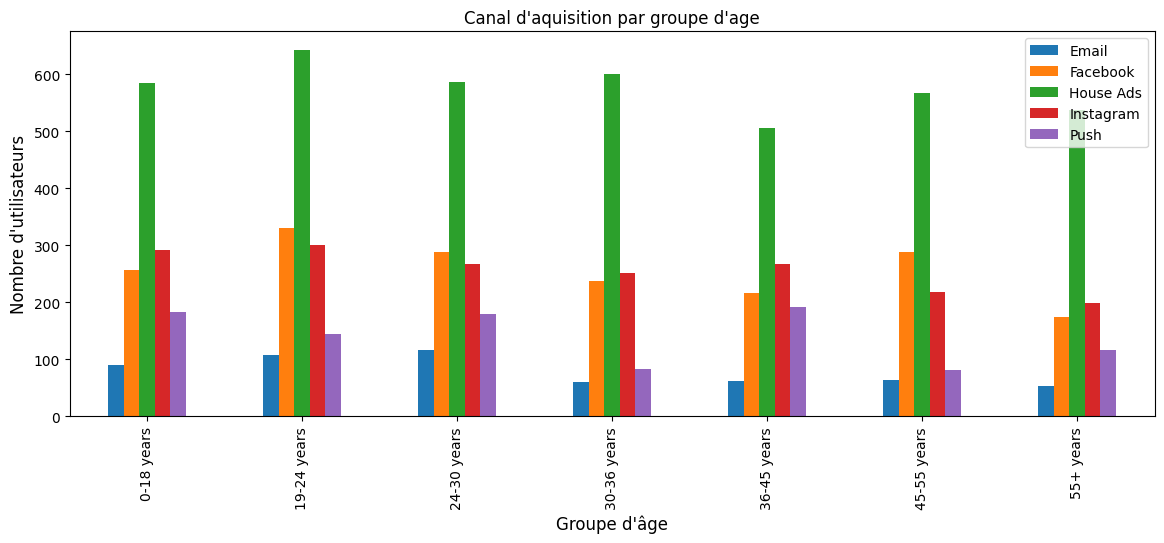

In [120]:
canal_age.plot(kind = "bar", figsize = (14, 5))

plt.xlabel("Groupe d'âge", fontsize =12)
plt.ylabel("Nombre d'utilisateurs", fontsize =12)
plt.legend(loc = "upper right", labels = canal_age.columns.values)

plt.title("Canal d'aquisition par groupe d'age", fontsize =12)
plt.show()

#### CONCLUSION